The data is available as two attached CSV files:
takehome_user_engagement.csv
takehome_users.csv

The data has the following two tables:

1] A user table ("takehome_users") with data on 12,000 users who signed up for the product in the last two years. This table includes:

● name: the user's name

● object_id: the user's id

● email: email address

● creation_source: how their account was created. This takes on one
of 5 values:

○ PERSONAL_PROJECTS: invited to join another user's personal workspace

○ GUEST_INVITE: invited to an organization as a guest (limited permissions)

○ ORG_INVITE: invited to an organization (as a full member)

○ SIGNUP: signed up via the website

○ SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)

● creation_time: when they created their account

● last_session_creation_time: unix timestamp of last login

● opted_in_to_mailing_list: whether they have opted into receiving marketing emails

● enabled_for_marketing_drip: whether they are on the regular marketing email drip

● org_id: the organization (group of users) they belong to

● invited_by_user_id: which user invited them to join (if applicable).

2] A usage summary table ("takehome_user_engagement") that has a row for each day that a user logged into the product.
Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period, identify which factors predict future user adoption.
We suggest spending 1-2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better, no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [252]:
user_eng = pd.read_csv("takehome_user_engagement.csv")

users = pd.read_csv("takehome_users.csv", encoding = 'latin1')

In [253]:
user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [254]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [255]:
# Defining the target variable

# Defining a user as adopted if that user has logged into the system in last 7 days

user_eng['time_stamp'] = pd.to_datetime(user_eng['time_stamp'])

In [256]:
user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [257]:
user_eng = user_eng.set_index('time_stamp')

In [258]:
user_eng.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [259]:
(user_eng.index[3] - user_eng.index[2]) + (user_eng.index[5] - user_eng.index[2])

Timedelta('42 days 00:00:00')

In [260]:
from datetime import timedelta

def adopted_user(uid):
    logins = user_eng.loc[user_eng['user_id'] == uid]
    logins = logins.resample('D').mean().dropna()
    adopted_user = 0
    for i in range(1,len(logins) - 1):
        delta1 = logins.index[i] - logins.index[i - 1]
        delta2 = logins.index[i + 1] - logins.index[i]
        
        if (delta1 + delta2) <= timedelta(days = 7):
            adopted_user = 1
            break
        else:
            adopted_user = 0
            
    return adopted_user
        
    

In [261]:
users['adopted_user'] = users['object_id'].apply(adopted_user)

In [262]:
len(users[users['adopted_user'] == 1]) / len(users)

0.138

We can see that only 14% of the total users were adopted users

### Data Wrangling

In [263]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted_user                12000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


Invited by user id is only applicable in cases where new users joined based on a referral. If there was no recommendation we replace the NaN values with 0

In [264]:
users['invited_by_user_id'] = users['invited_by_user_id'].fillna(0)

In [265]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [266]:
import datetime
users['last_session_creation_time'].map(lambda time_in: 
                                        datetime.datetime.utcfromtimestamp(int(time_in)).strftime('%Y-%m-%d %H:%M:%S'), 
                                                                                              na_action = 'ignore')

0        2014-04-22 03:53:30
1        2014-03-31 03:45:04
2        2013-03-19 23:14:52
3        2013-05-22 08:09:28
4        2013-01-22 10:14:20
                ...         
11995    2013-09-06 06:14:15
11996    2013-01-15 18:28:37
11997    2014-04-27 12:45:16
11998    2012-06-02 11:55:59
11999    2014-01-26 08:57:12
Name: last_session_creation_time, Length: 12000, dtype: object

Converting the creation_time and last_session_creation_time to timestamp datatypes from object and float

In [267]:
import datetime
# Creation time
users['creation_time'] = pd.to_datetime(users['creation_time'])

# Last session creation time

users['last_session_creation_time'] = users['last_session_creation_time'].map(lambda time_in : 
                                      datetime.datetime.utcfromtimestamp(int(time_in)).strftime('%Y-%m-%d %H:%M:%S'),
                                      na_action = 'ignore')

In [268]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
 10  adopted_user                12000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)


In [269]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


In [270]:
users[users['last_session_creation_time'].isna()]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,0.0,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,0.0,0
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaN,0,0,130,9270.0,0
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,175,0.0,0
15,16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,211,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
11975,11976,2013-12-25 22:01:41,Kohl Leah,LeahKohl@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,248,0.0,0
11977,11978,2014-04-23 16:28:06,Castro Pedro,PedroCunhaCastro@gustr.com,PERSONAL_PROJECTS,NaN,1,0,29,0.0,0
11984,11985,2013-07-08 17:23:26,Jespersen Marcus,MarcusTJespersen@cuvox.de,PERSONAL_PROJECTS,NaN,0,0,74,0.0,0
11992,11993,2013-03-28 23:24:21,Townsend Isabel,IsabelTownsend@cuvox.de,PERSONAL_PROJECTS,NaN,0,0,281,0.0,0


In [271]:
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'])

In [272]:
users[users['last_session_creation_time'].isna()]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,0.0,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,0.0,0
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaT,0,0,130,9270.0,0
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,175,0.0,0
15,16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,211,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
11975,11976,2013-12-25 22:01:41,Kohl Leah,LeahKohl@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,248,0.0,0
11977,11978,2014-04-23 16:28:06,Castro Pedro,PedroCunhaCastro@gustr.com,PERSONAL_PROJECTS,NaT,1,0,29,0.0,0
11984,11985,2013-07-08 17:23:26,Jespersen Marcus,MarcusTJespersen@cuvox.de,PERSONAL_PROJECTS,NaT,0,0,74,0.0,0
11992,11993,2013-03-28 23:24:21,Townsend Isabel,IsabelTownsend@cuvox.de,PERSONAL_PROJECTS,NaT,0,0,281,0.0,0


In [273]:
users.iloc[7,1]

Timestamp('2013-07-31 05:34:02')

In [274]:
users['duration'] = users['last_session_creation_time'] - users['creation_time']

In [275]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   object_id                   12000 non-null  int64          
 1   creation_time               12000 non-null  datetime64[ns] 
 2   name                        12000 non-null  object         
 3   email                       12000 non-null  object         
 4   creation_source             12000 non-null  object         
 5   last_session_creation_time  8823 non-null   datetime64[ns] 
 6   opted_in_to_mailing_list    12000 non-null  int64          
 7   enabled_for_marketing_drip  12000 non-null  int64          
 8   org_id                      12000 non-null  int64          
 9   invited_by_user_id          12000 non-null  float64        
 10  adopted_user                12000 non-null  int64          
 11  duration                    8823 non-null

In [276]:
users[~users['duration'].isna()]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,duration
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,0 days
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,136 days
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,0 days
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1 days
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,0,0 days
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0.0,0,5 days
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,0,0 days
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0.0,0,2 days


For rows that have invalid values for last session creation time we assume that the user never logged in after creating an account and we will fill those rows with the same value as the creation_time

In [277]:
users.loc[users['last_session_creation_time'].isna(),'last_session_creation_time'] = users.loc[users['last_session_creation_time'].isna(), 'creation_time']

In [278]:
users.loc[users['last_session_creation_time'].isna()]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,duration


In [279]:
users.sample(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,duration
9062,9063,2012-07-15 23:02:48,Durr Ines,InesDurr@gmail.com,SIGNUP_GOOGLE_AUTH,2012-07-17 23:02:48,0,0,1,0.0,0,2 days
3670,3671,2012-12-06 02:21:47,Kristiansen Selma,SelmaTKristiansen@jourrapide.com,ORG_INVITE,2014-05-22 02:21:47,1,1,182,11129.0,1,532 days
770,771,2013-11-30 12:36:23,Friedmann Sara,SaraFriedmann@jourrapide.com,ORG_INVITE,2013-12-02 12:36:23,1,0,18,3940.0,0,2 days
11481,11482,2012-09-27 18:15:50,Hilton Eloise,EloiseHilton@gmail.com,ORG_INVITE,2012-09-28 18:15:50,0,0,370,2622.0,0,1 days
8261,8262,2014-05-27 09:04:46,Toft Marcus,MarcusRToft@gmail.com,ORG_INVITE,2014-05-27 09:04:46,0,0,45,4251.0,0,0 days
1828,1829,2014-04-27 17:44:53,Amsel Sabine,SabineAmsel@gmail.com,SIGNUP_GOOGLE_AUTH,2014-04-29 17:44:53,0,0,218,0.0,0,2 days
9279,9280,2012-12-22 13:09:54,Grimwade Stella,StellaGrimwade@gustr.com,ORG_INVITE,2012-12-22 13:09:54,1,1,263,9280.0,0,NaT
1078,1079,2012-11-16 08:18:08,Pugh Freddie,FreddiePugh@yahoo.com,SIGNUP,2012-11-23 08:18:08,0,0,350,0.0,0,7 days
3467,3468,2014-05-29 00:35:51,Neustadt Anke,AnkeNeustadt@gmail.com,SIGNUP_GOOGLE_AUTH,2014-05-31 00:35:51,0,0,303,0.0,0,2 days
3946,3947,2013-12-04 01:13:29,Barbosa Luís,LuisCorreiaBarbosa@yahoo.com,SIGNUP,2013-12-21 01:13:29,0,0,383,0.0,0,17 days


In [280]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,duration
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,0 days
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,136 days
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,0 days
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1 days
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,5 days


In [281]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   object_id                   12000 non-null  int64          
 1   creation_time               12000 non-null  datetime64[ns] 
 2   name                        12000 non-null  object         
 3   email                       12000 non-null  object         
 4   creation_source             12000 non-null  object         
 5   last_session_creation_time  12000 non-null  datetime64[ns] 
 6   opted_in_to_mailing_list    12000 non-null  int64          
 7   enabled_for_marketing_drip  12000 non-null  int64          
 8   org_id                      12000 non-null  int64          
 9   invited_by_user_id          12000 non-null  float64        
 10  adopted_user                12000 non-null  int64          
 11  duration                    8823 non-null

In [282]:
users['duration'] = users['last_session_creation_time'] - users['creation_time']

In [283]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   object_id                   12000 non-null  int64          
 1   creation_time               12000 non-null  datetime64[ns] 
 2   name                        12000 non-null  object         
 3   email                       12000 non-null  object         
 4   creation_source             12000 non-null  object         
 5   last_session_creation_time  12000 non-null  datetime64[ns] 
 6   opted_in_to_mailing_list    12000 non-null  int64          
 7   enabled_for_marketing_drip  12000 non-null  int64          
 8   org_id                      12000 non-null  int64          
 9   invited_by_user_id          12000 non-null  float64        
 10  adopted_user                12000 non-null  int64          
 11  duration                    12000 non-nul

In [284]:
users.sample(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,duration
210,211,2013-10-15 14:33:01,Jepsen Malou,MalouMJepsen@gmail.com,ORG_INVITE,2013-10-16 14:33:01,1,0,1,5107.0,0,1 days
8661,8662,2013-09-26 22:55:52,Fry Jodie,JodieFry@gmail.com,ORG_INVITE,2013-09-26 22:55:52,0,0,338,1528.0,0,0 days
649,650,2013-10-24 22:55:41,Burkhalter Drusilla,DrusillaRBurkhalter@yahoo.com,PERSONAL_PROJECTS,2013-10-24 22:55:41,0,0,20,0.0,0,0 days
11537,11538,2013-11-21 09:43:03,Clutterbuck Dean,DeanClutterbuck@gmail.com,ORG_INVITE,2013-11-24 09:43:03,0,0,87,1393.0,0,3 days
9021,9022,2014-05-25 11:07:42,Hobbs Faith,FaithHobbs@hotmail.com,PERSONAL_PROJECTS,2014-05-25 11:07:42,0,0,2,0.0,0,0 days
7139,7140,2013-10-23 02:01:49,Connor Charlie,CharlieConnor@gustr.com,ORG_INVITE,2013-10-25 02:01:49,1,1,234,11026.0,0,2 days
4113,4114,2014-05-21 03:47:01,Sherwin Ruby,RubySherwin@cuvox.de,ORG_INVITE,2014-05-23 03:47:01,0,0,106,4976.0,0,2 days
9157,9158,2014-05-10 07:57:31,Wright Mollie,MollieWright@gustr.com,ORG_INVITE,2014-05-10 07:57:31,0,0,204,7797.0,0,0 days
4789,4790,2014-04-17 06:02:03,Cavalcanti Martim,MartimPereiraCavalcanti@gmail.com,ORG_INVITE,2014-04-17 06:02:03,1,1,406,3068.0,0,0 days
1945,1946,2014-05-24 10:55:53,Sousa Luan,LuanSilvaSousa@gmail.com,GUEST_INVITE,2014-05-24 10:55:53,0,0,74,7716.0,0,0 days


Having used the creation time and last session time to create a feature, we can safely drop those two columns

In [285]:
users = users.drop(['creation_time', 'last_session_creation_time'], axis = 1)

In [286]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   object_id                   12000 non-null  int64          
 1   name                        12000 non-null  object         
 2   email                       12000 non-null  object         
 3   creation_source             12000 non-null  object         
 4   opted_in_to_mailing_list    12000 non-null  int64          
 5   enabled_for_marketing_drip  12000 non-null  int64          
 6   org_id                      12000 non-null  int64          
 7   invited_by_user_id          12000 non-null  float64        
 8   adopted_user                12000 non-null  int64          
 9   duration                    12000 non-null  timedelta64[ns]
dtypes: float64(1), int64(5), object(3), timedelta64[ns](1)
memory usage: 937.6+ KB


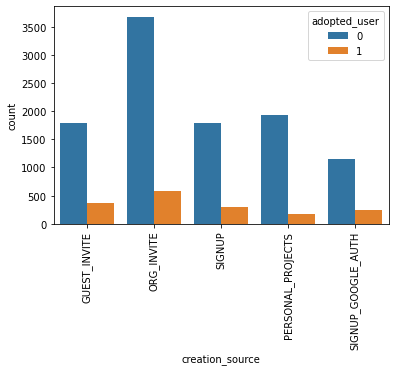

In [287]:
# Analysing the distribution of the creation source based on adopted users

_= sns.countplot(data = users, x = 'creation_source', hue = 'adopted_user')
_ = plt.xticks(rotation = 90)

Based on the distribution we see that users who signed up through organizational invites have the maximum number of adopted users, but also the most number of users who left. 

Another interesting plot would be to see the duration of time users haec held their account differentiated based on adopted vs not adopted users

In [288]:
users['duration'].dt.days

0          0
1        136
2          0
3          1
4          5
        ... 
11995      0
11996      5
11997      0
11998      2
11999      0
Name: duration, Length: 12000, dtype: int64

In [289]:
users['duration'] = users['duration'].dt.days

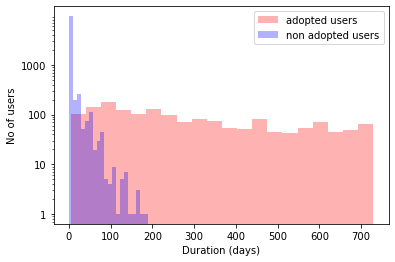

In [290]:
_ = plt.hist(users.loc[users['adopted_user'] == 1, 'duration'],
            bins = 20, alpha = 0.3, color = 'r', label = 'adopted users')
_ = plt.hist(users.loc[users['adopted_user'] == 0, 'duration'], 
            bins = 20, alpha = 0.3, color = 'b', label = 'non adopted users')

_ = plt.yscale('log')
_ = plt.legend()

_ = plt.xlabel('Duration (days)')
_ = plt.ylabel('No of users')

_ = plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])

In [291]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   name                        12000 non-null  object 
 2   email                       12000 non-null  object 
 3   creation_source             12000 non-null  object 
 4   opted_in_to_mailing_list    12000 non-null  int64  
 5   enabled_for_marketing_drip  12000 non-null  int64  
 6   org_id                      12000 non-null  int64  
 7   invited_by_user_id          12000 non-null  float64
 8   adopted_user                12000 non-null  int64  
 9   duration                    12000 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 937.6+ KB


Now that we have all the fields with valid information this data set is ready for preporcessing and modeling.

### Preprocessing and Modeling

Looking at the features above se see that features such as object_id, name, email are just attributes of the individual users and do not help in predicting user adoption. These can be dropped.

In [292]:
features = users.drop(['object_id', 'name', 'email'], axis = 1)

In [293]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   org_id                      12000 non-null  int64  
 4   invited_by_user_id          12000 non-null  float64
 5   adopted_user                12000 non-null  int64  
 6   duration                    12000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 656.4+ KB


In [294]:
# creating dummy variable for the categorical column 'creation_source'
source = pd.get_dummies(features['creation_source'], drop_first = True)
features_final = pd.concat([features, source], axis = 1)
features_final = features_final.drop(['creation_source'], axis = 1)

In [295]:
features_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   opted_in_to_mailing_list    12000 non-null  int64  
 1   enabled_for_marketing_drip  12000 non-null  int64  
 2   org_id                      12000 non-null  int64  
 3   invited_by_user_id          12000 non-null  float64
 4   adopted_user                12000 non-null  int64  
 5   duration                    12000 non-null  int64  
 6   ORG_INVITE                  12000 non-null  uint8  
 7   PERSONAL_PROJECTS           12000 non-null  uint8  
 8   SIGNUP                      12000 non-null  uint8  
 9   SIGNUP_GOOGLE_AUTH          12000 non-null  uint8  
dtypes: float64(1), int64(5), uint8(4)
memory usage: 609.5 KB


In [296]:
X = features_final.drop(['adopted_user'], axis = 1)
y = features_final['adopted_user']

In [297]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.3, random_state = 123)


In [298]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [299]:
rf = RandomForestClassifier(random_state = 23)
param_grid = {'n_estimators':[50, 75, 150, 300]}

model_rf = GridSearchCV(rf, param_grid)
model_rf.fit(X_tr, y_tr)



GridSearchCV(estimator=RandomForestClassifier(random_state=23),
             param_grid={'n_estimators': [50, 75, 150, 300]})

In [300]:
model_rf.best_params_

{'n_estimators': 300}

In [301]:
rf_300 = RandomForestClassifier(random_state = 23, n_estimators = 300)
rf_300.fit(X_tr, y_tr)

RandomForestClassifier(n_estimators=300, random_state=23)

In [302]:
ypred = rf_300.predict(X_te)

In [303]:
from sklearn.metrics import accuracy_score, classification_report

In [306]:
print('Accuracy of the model is ',accuracy_score(y_te, ypred))

Accuracy of the model is  0.9741666666666666


In [307]:
print(classification_report(y_te, ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3065
           1       0.93      0.89      0.91       535

    accuracy                           0.97      3600
   macro avg       0.96      0.94      0.95      3600
weighted avg       0.97      0.97      0.97      3600



In [311]:
feature_importances = pd.DataFrame()
feature_importances['Value'] = rf_300.feature_importances_
feature_importances = feature_importances.set_index(X.columns)

In [314]:
feature_importances.sort_values(by  = 'Value',ascending = False)

,Value
duration,0.876091
org_id,0.066091
invited_by_user_id,0.036188
opted_in_to_mailing_list,0.005142
ORG_INVITE,0.003978
PERSONAL_PROJECTS,0.003872
enabled_for_marketing_drip,0.003544
SIGNUP_GOOGLE_AUTH,0.002554
SIGNUP,0.002539


<AxesSubplot:>

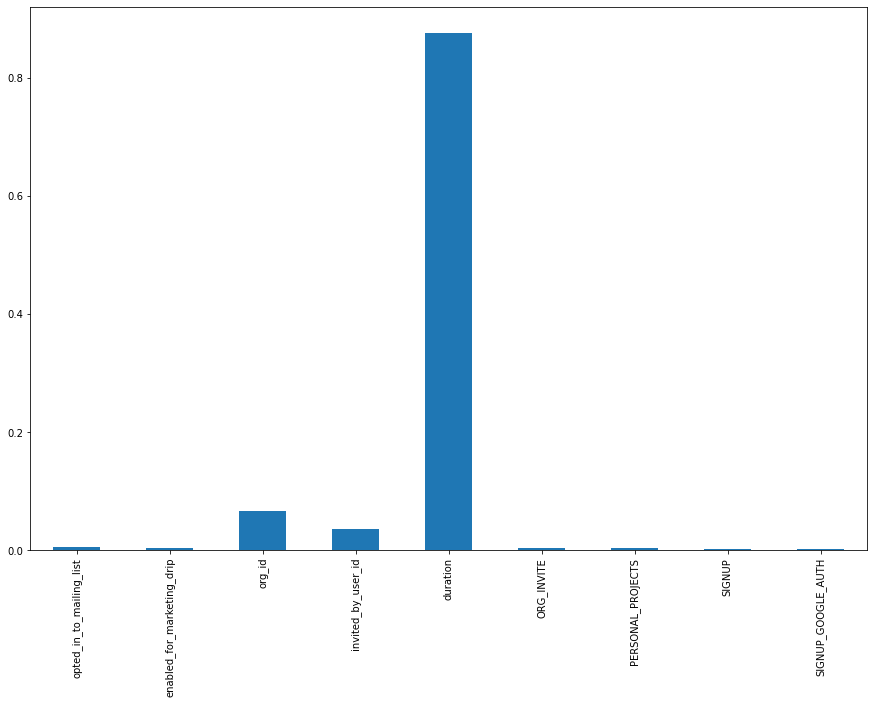

In [315]:
plt.figure(figsize = (15, 10))
feature_importances['Value'].plot(kind = 'bar', x = feature_importances.columns)

We can see from the plot above that the most important factors affecting user adoption is the duration of use followed by the orgainization they are a part of. It appears that users that are part of organizations are more likely to signup for the product. This can be made as a recommendation to the customer that more organization drives can me made to make users aware of the product and its features.